# Multi-Arm Bandit Algorithm : Epsilon-Greedy

Gaussian Reward

Bernoulli Reward

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Example : Guassian Reward

#### Case 1: Reward is collected at each time step

In [2]:
def run_experiment(number_of_bandit, q_true, eps, number_of_run, number_of_timestep):
    
    sum_of_rewards        = np.zeros( number_of_timestep )
    sum_of_regrets        = np.zeros( number_of_timestep )
    count_of_all_actions    = np.zeros( (number_of_timestep, number_of_bandit) )
    count_of_optimal_action = np.zeros( number_of_timestep )
    
    q_star = np.random.choice( np.where(q_true == q_true.max())[0] )
    
    for r in range(number_of_run):    
        #q_true = np.random.normal(0,1,number_of_bandit)
        
        N_act = np.zeros( number_of_bandit, dtype=np.int)
        Q_act = np.zeros( number_of_bandit, dtype=np.float)
    
        list_of_actions = []
        list_of_rewards = []
        list_of_regrets = []
        list_of_optimal_action = np.zeros( number_of_timestep )

        for t in range(number_of_timestep):
            """Step 1: Choose an action"""
            rand_prob = np.random.random()
            if rand_prob < eps:
                """pick one of the slot machines randomly"""
                A = np.random.choice(number_of_bandit)
            else:
                """pick the slot machine with the highest expected reward"""
                #A = np.argmax( Q_act )
                #Q_max = Q_act.max()
                #A = np.random.choice(np.flatnonzero(Q_act == Q_max)) 
                
                Q_max = Q_act.max()
                A = np.random.choice(np.where(Q_act == Q_max)[0])

            """Step 2: Get the reward corresponding to that action"""
            reward = np.random.normal(q_true[A],1)

            """Step 3: Update N and Q"""
            N_act[A] += 1
            Q_act[A] += (reward - Q_act[A])/N_act[A]
            
            """Step 4: Collect actions, rewards, and regrets"""
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            regret = q_star - q_true[A]
            list_of_regrets.append(regret)
            
            if A == np.argmax(q_true):
                list_of_optimal_action[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        sum_of_regrets += np.array(list_of_regrets)
        count_of_optimal_action += np.array( list_of_optimal_action )
        
        for step, arm in enumerate(list_of_actions):
            count_of_all_actions[step][arm] += 1
            
    average_reward  = sum_of_rewards /np.float(number_of_run)
    average_regret  = sum_of_regrets /np.float(number_of_run)
    percent_of_optimal_action = count_of_optimal_action /np.float(number_of_run)
    
    return average_reward, average_regret, percent_of_optimal_action, count_of_all_actions

In [3]:
rg = np.random.default_rng()

number_of_bandit = 10
number_of_run = 5000
number_of_time_step = 1000

q_true = rg.normal(0, 1, number_of_bandit)
print("The Arm with the Highest Reward:", np.argmax(q_true) )

average_reward_00, average_regret_00, optimal_action_00, action_00 = run_experiment(number_of_bandit, q_true, 0.00, number_of_run, number_of_time_step)
average_reward_01, average_regret_01, optimal_action_01, action_01 = run_experiment(number_of_bandit, q_true, 0.01, number_of_run, number_of_time_step)
average_reward_10, average_regret_10, optimal_action_10, action_10 = run_experiment(number_of_bandit, q_true, 0.10, number_of_run, number_of_time_step) 

The Arm with the Highest Reward: 9


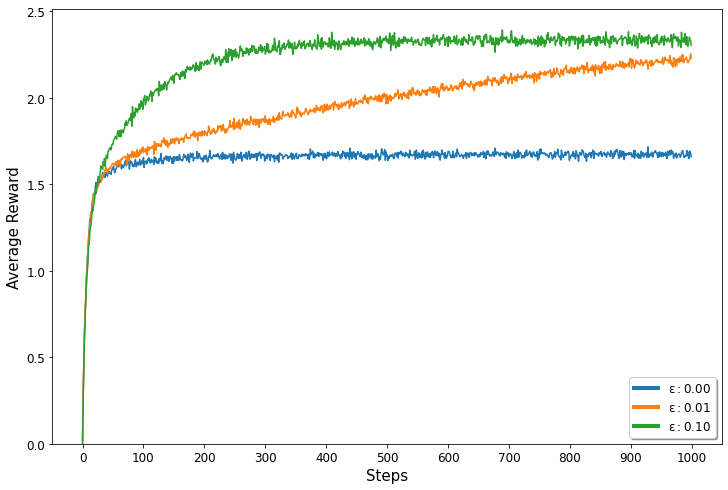

In [4]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_00, label =r'$\mathrm{\epsilon} : 0.00$') 
plt.plot(average_reward_01, label =r'$\mathrm{\epsilon} : 0.01$') 
plt.plot(average_reward_10, label =r'$\mathrm{\epsilon} : 0.10$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

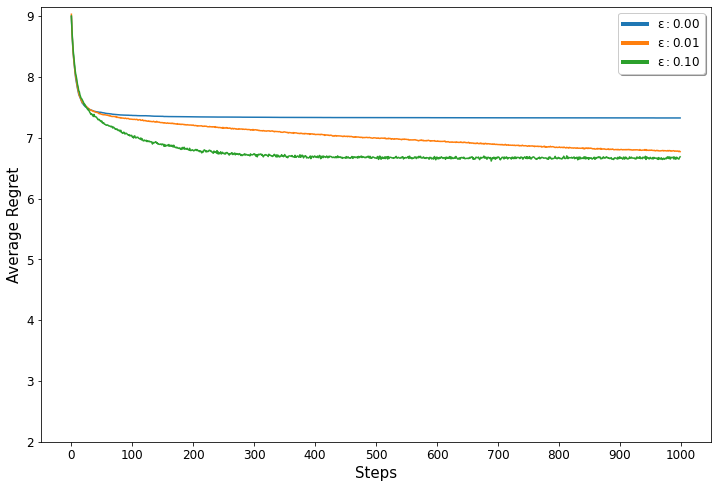

In [5]:
# Plot regret results
plt.figure(figsize = (12, 8)) 
plt.plot(average_regret_00, label =r'$\mathrm{\epsilon} : 0.00$') 
plt.plot(average_regret_01, label =r'$\mathrm{\epsilon} : 0.01$')
plt.plot(average_regret_10, label =r'$\mathrm{\epsilon} : 0.10$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Regret", fontsize=15)

legend = plt.legend(loc='upper right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)

#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=2)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

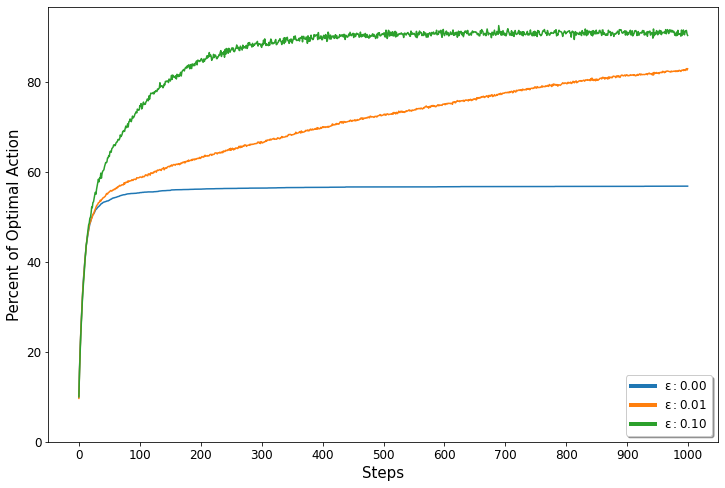

In [6]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*optimal_action_00, label =r'$\mathrm{\epsilon} : 0.00$') 
plt.plot(100*optimal_action_01, label =r'$\mathrm{\epsilon} : 0.01$') 
plt.plot(100*optimal_action_10, label =r'$\mathrm{\epsilon} : 0.10$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15) 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

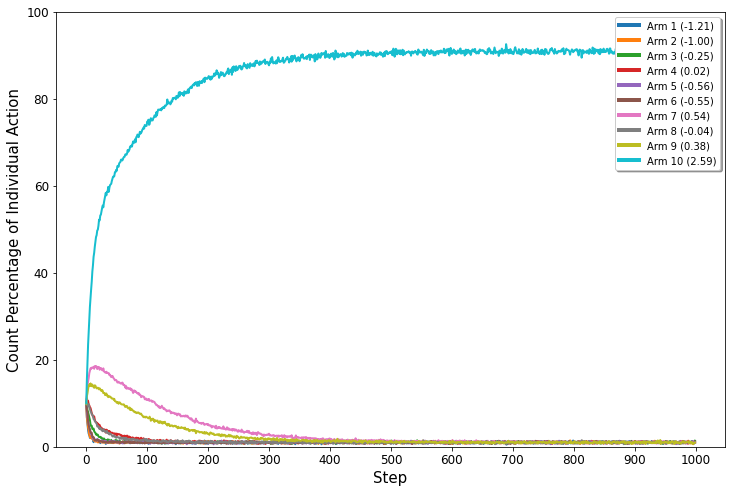

In [7]:
# Plot individual action results
plt.figure(figsize = (12, 8)) 

action = [action_00, action_01, action_10]

for i in range( number_of_bandit ):
    action_pct = 100 * action[2][:,i] / number_of_run
    steps = list( np.array(range(len(action_pct))) )
    plt.plot( steps, action_pct, "-", linewidth=2, label="Arm {} ({:.2f})".format(i+1, q_true[i]))
plt.xlabel("Step", fontsize=15)
plt.ylabel("Count Percentage of Individual Action", fontsize=15)
legend = plt.legend(loc='upper right', shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0, ymax=100)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [8]:
del run_experiment

#### Case 2 : Reward is Averaged at Each Time Step

In [9]:
def run_experiment(number_of_bandit, q_true, eps, number_of_run, number_of_timestep):

    sum_of_rewards   = np.zeros( number_of_timestep )
    count_of_all_actions = np.zeros( (number_of_timestep, number_of_bandit) )
    count_of_optimal_action = np.zeros( number_of_timestep )

    for r in range(number_of_run):       
        N_act = np.zeros( number_of_bandit, dtype=np.int)
        Q_act = np.zeros( number_of_bandit, dtype=np.float)
    
        n = 0
        mean_reward = 0
        list_of_actions = []
        list_of_rewards = []
        list_of_optimal_action = np.zeros( number_of_timestep )
        
        for t in range(number_of_timestep):
            """Step 1: Choose an action"""
            rand_prob = np.random.random()
            if rand_prob < eps:
                """pick one of the slot machines randomly"""
                A = np.random.choice(number_of_bandit)
            else:
                """pick the slot machine with the highest expected reward"""
                #A = np.argmax( Q_act )
                #Q_max = Q_act.max()
                #A = np.random.choice(np.flatnonzero(Q_act == Q_max)) 
                Q_max = Q_act.max()
                A = np.random.choice(np.where(Q_act == Q_max)[0])

            """Step 2: Get a reward corresponding to that action"""
            #reward = np.random.randn() + A
            reward = np.random.normal(q_true[A],1)

            """Step 3: Update N and Q"""
            N_act[A] += 1
            Q_act[A] += (reward - Q_act[A])/N_act[A]
            
            n += 1
            mean_reward += (reward-mean_reward)/n 

            list_of_actions.append(A)
            list_of_rewards.append(mean_reward)
            
            if A == np.argmax(q_true):
                list_of_optimal_action[t] += 1
            
        sum_of_rewards += (np.array(list_of_rewards - sum_of_rewards))/(r+1)
        count_of_optimal_action += np.array( list_of_optimal_action )
        for step, arm in enumerate(list_of_actions):
            count_of_all_actions[step][arm] += 1
            
    average_reward = sum_of_rewards
    percent_of_optimal_action = count_of_optimal_action /np.float(number_of_run)
    
    return average_reward, percent_of_optimal_action, count_of_all_actions

In [10]:
rg = np.random.default_rng()

number_of_bandit = 10
number_of_run = 2000
number_of_time_step = 1000

q_true = rg.normal(0,1,number_of_bandit)
print("The Arm with Highest Reward:", np.argmax(q_true) )

average_reward_00, optimal_action_00, action_00 = run_experiment(number_of_bandit, q_true, 0.00, number_of_run, number_of_time_step)
average_reward_01, optimal_action_01, action_01 = run_experiment(number_of_bandit, q_true, 0.01, number_of_run, number_of_time_step)
average_reward_10, optimal_action_10, action_10 = run_experiment(number_of_bandit, q_true, 0.10, number_of_run, number_of_time_step) 

The Arm with Highest Reward: 9


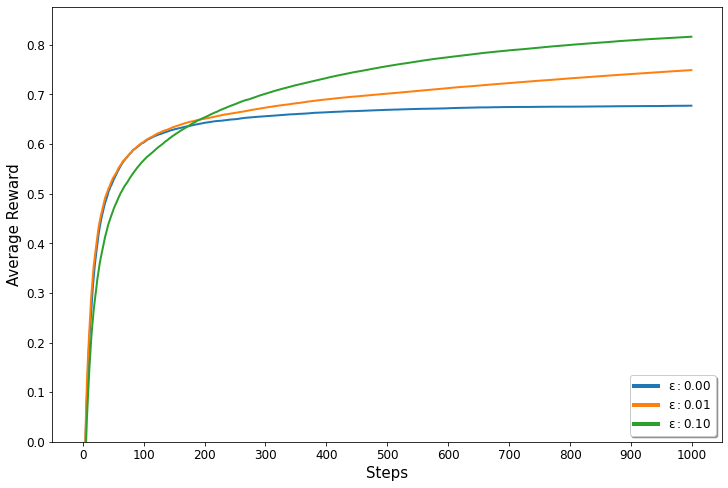

In [11]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_00, linewidth=2, label =r'$\mathrm{\epsilon} : 0.00$') 
plt.plot(average_reward_01, linewidth=2, label =r'$\mathrm{\epsilon} : 0.01$') 
plt.plot(average_reward_10, linewidth=2, label =r'$\mathrm{\epsilon} : 0.10$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

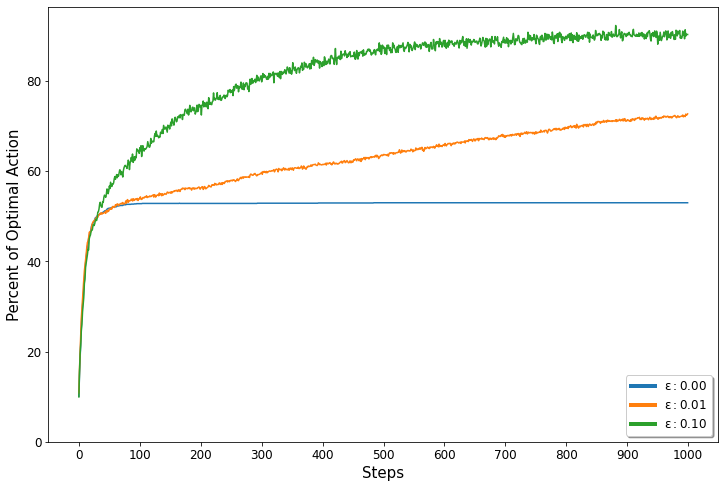

In [12]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*optimal_action_00, label =r'$\mathrm{\epsilon} : 0.00$') 
plt.plot(100*optimal_action_01, label =r'$\mathrm{\epsilon} : 0.01$') 
plt.plot(100*optimal_action_10, label =r'$\mathrm{\epsilon} : 0.10$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)
plt.legend() 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

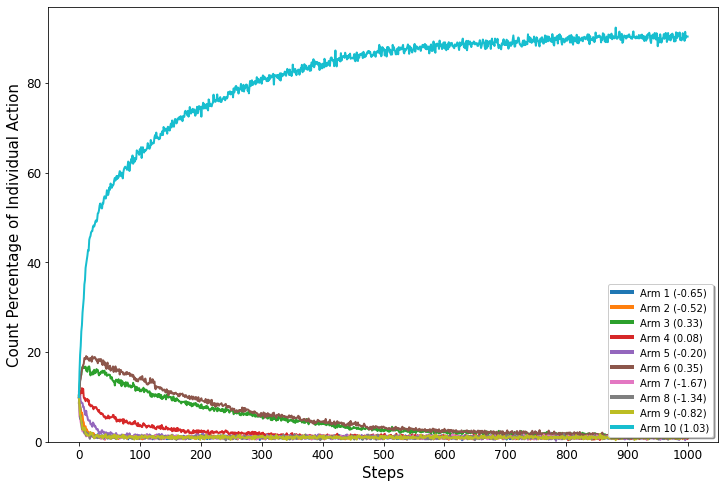

In [13]:
# Plot action results
plt.figure(figsize = (12, 8)) 

action = [action_00, action_01, action_10]

for i in range( number_of_bandit ):
    action_pct = 100 * action[2][:,i] / number_of_run
    steps = list( np.array(range(len(action_pct))) )
    plt.plot( steps, action_pct, "-", linewidth=2, label="Arm {} ({:.2f})".format(i+1, q_true[i]))
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Count Percentage of Individual Action", fontsize=15)
legend = plt.legend(loc='upper right', shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
del run_experiment

### Example : Bernoulli Reward

In [15]:
def run_experiment(number_of_bandit, q_true, eps, number_of_run, number_of_time_step):
    
    sum_of_rewards        = np.zeros( number_of_time_step )
    sum_of_regrets        = np.zeros( number_of_time_step )
    count_of_all_actions      = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_optimal_action = np.zeros( number_of_time_step )
    
    q_star = np.random.choice( np.where(q_true == q_true.max())[0] )
    
    for r in range(number_of_run):        
        N_act = np.zeros( number_of_bandit, dtype=np.int)
        Q_act = np.zeros( number_of_bandit, dtype=np.float)
    
        list_of_actions = []
        list_of_rewards = []
        list_of_regrets = []
        list_of_optimal_action = np.zeros( number_of_time_step )

        for t in range(number_of_time_step):
            """Step 1: Choose an action"""
            rand_prob = np.random.random()
            if rand_prob <= eps:
                """pick one of the slot machines randomly"""
                A = np.random.choice(number_of_bandit)
            else:
                """pick the slot machine with the highest expected reward"""
                #A = np.argmax( Q_act )
                #Q_max = Q_act.max()
                #A = np.random.choice(np.flatnonzero(Q_act == Q_max))
                
                Q_max = Q_act.max()
                A = np.random.choice(np.where(Q_act == Q_max)[0])
                
            """Step 2: Get a reward corresponding to that action"""
            #if np.random.random() <= q_true[A]:
            #    reward = 1
            #else:
            #    reward = 0
            reward = np.random.binomial(n=1, p=q_true[A], size=1)[0]
            
            """Step 3: Update N and Q"""
            N_act[A] += 1
            Q_act[A] += (reward - Q_act[A])/N_act[A]
            
            """Step 4: Collect actions, rewards, and regrets"""
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            regret = q_star - q_true[A]
            list_of_regrets.append(regret)
            
            if A == np.argmax(q_true):
                list_of_optimal_action[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        sum_of_regrets += np.array(list_of_regrets)
        count_of_optimal_action += np.array( list_of_optimal_action )
        
        for step, arm in enumerate(list_of_actions):
            count_of_all_actions[step][arm] += 1
    
    average_reward  = sum_of_rewards /np.float(number_of_run)
    average_regret  = sum_of_regrets /np.float(number_of_run)
    percent_of_optimal_action = count_of_optimal_action /np.float(number_of_run)
    
    return average_reward, average_regret, percent_of_optimal_action, count_of_all_actions

In [16]:
rg = np.random.default_rng()

number_of_bandit = 10
number_of_run = 5000
number_of_time_step = 1000

#q_true = rg.uniform(0.1, 0.7, number_of_bandit)
#q_true = np.array([0.21, 0.11, 0.38, 0.05, 0.55, 0.32, 0.47, 0.16, 0.26, 0.15])
q_true = np.array([0.10, 0.50, 0.60, 0.80, 0.05, 0.25, 0.60, 0.45, 0.75, 0.65])
print("The Arm with the Highest Reward:", np.argmax(q_true) )

average_reward_00, average_regret_00, optimal_action_00, action_00 = run_experiment(number_of_bandit, q_true, 0.00, number_of_run, number_of_time_step)
average_reward_01, average_regret_01, optimal_action_01, action_01 = run_experiment(number_of_bandit, q_true, 0.01, number_of_run, number_of_time_step)
average_reward_10, average_regret_10, optimal_action_10, action_10 = run_experiment(number_of_bandit, q_true, 0.10, number_of_run, number_of_time_step) 

The Arm with the Highest Reward: 3


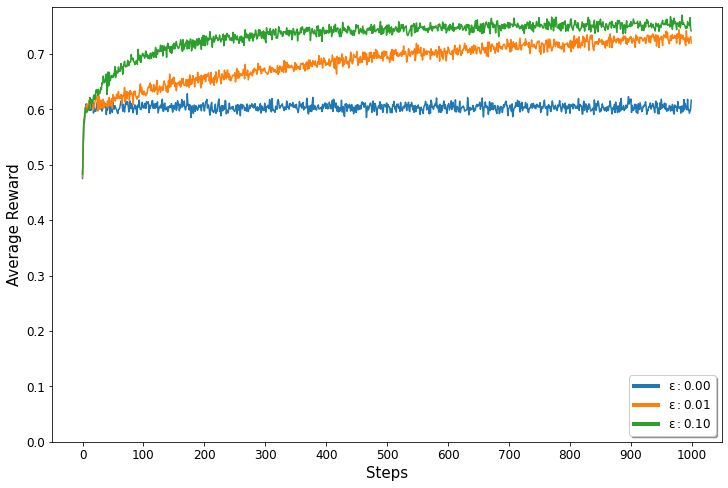

In [17]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_00, label =r'$\mathrm{\epsilon} : 0.00$') 
plt.plot(average_reward_01, label =r'$\mathrm{\epsilon} : 0.01$') 
plt.plot(average_reward_10, label =r'$\mathrm{\epsilon} : 0.10$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

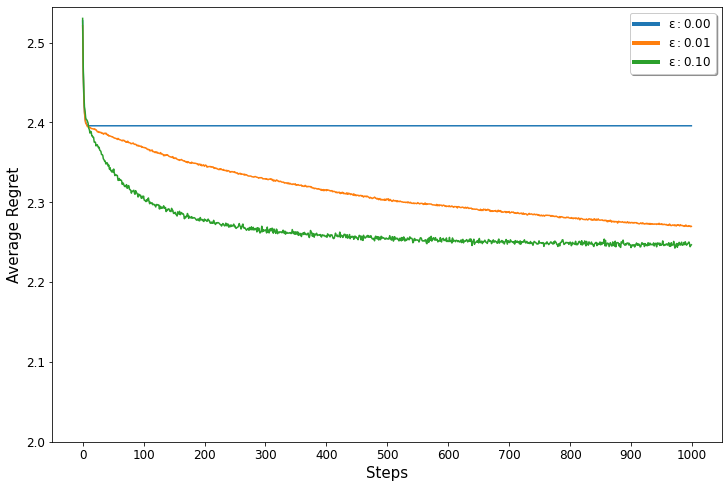

In [18]:
# Plot regret results
plt.figure(figsize = (12, 8)) 
plt.plot(average_regret_00, label =r'$\mathrm{\epsilon} : 0.00$') 
plt.plot(average_regret_01, label =r'$\mathrm{\epsilon} : 0.01$')
plt.plot(average_regret_10, label =r'$\mathrm{\epsilon} : 0.10$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Regret", fontsize=15)
legend = plt.legend(loc='upper right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=2)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

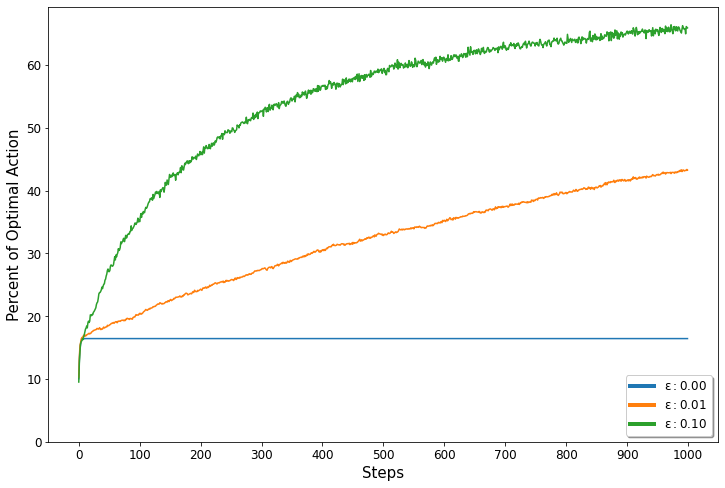

In [19]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*optimal_action_00, label =r'$\mathrm{\epsilon} : 0.00$') 
plt.plot(100*optimal_action_01, label =r'$\mathrm{\epsilon} : 0.01$') 
plt.plot(100*optimal_action_10, label =r'$\mathrm{\epsilon} : 0.10$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)
plt.legend() 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

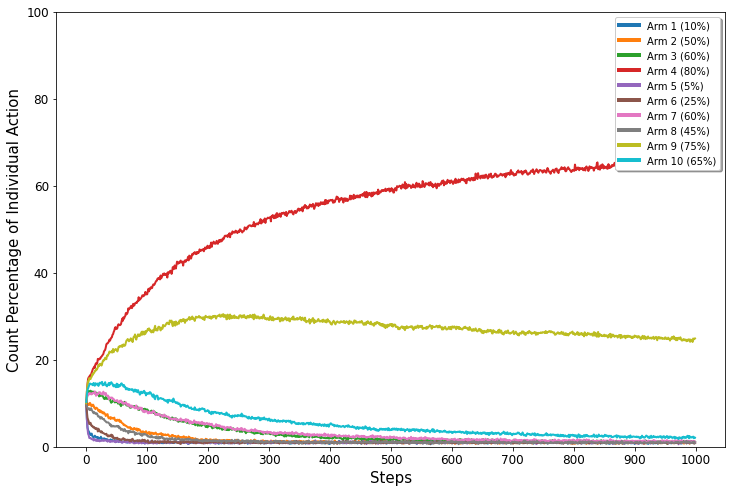

In [20]:
# Plot action results
plt.figure(figsize = (12, 8)) 

action = [action_00, action_01, action_10]

for i in range( number_of_bandit ):
    action_pct = 100 * action[2][:,i] / number_of_run
    steps = list( np.array(range(len(action_pct))) )
    plt.plot( steps, action_pct, "-", linewidth=2, label="Arm {} ({:.0f}%)".format(i+1, 100*q_true[i]))
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Count Percentage of Individual Action", fontsize=15)
legend = plt.legend(loc='upper right', shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0, ymax=100)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()